# Feature Extract

In [44]:
import numpy as np
import torch.nn as nn
import webdataset as wds
import matplotlib.pyplot as plt
import torchvision.models as models
import torchvision.transforms.functional as F

from torchvision.models.feature_extraction import create_feature_extractor

## Setup

In [2]:
root = '.'
data_folder = f'{root}/data'

## Load Data

In [3]:
ds_train = (wds.WebDataset(f'file:{data_folder}/train-000000.tar', shardshuffle=False)
    .decode("pil")
    .to_tuple("jpg", "json"))

In [4]:
sample = next(iter(ds_train))

In [5]:
print(sample)

(<PIL.Image.Image image mode=RGB size=227x227 at 0x14536E39400>, {'ttype': None, 'base': 'ESP_013049_0950_RED-0067.jpg', 'label': 7, 'image': 'ESP_013049_0950_RED-0067.jpg'})


In [6]:
image, meta = sample

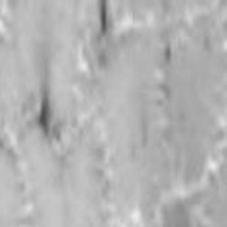

In [7]:
image

## Feature Extract

In [9]:
resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

In [10]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
feature_extractor = nn.Sequential(*list(resnet.children())[:-1])

In [12]:
print(feature_extractor)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [18]:
def transform(image):
    # image = F.resize(image, 256)
    # image = F.center_crop(image, 224)
    image = F.to_tensor(image)
    image = F.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return image

In [19]:
image = transform(image)

In [21]:
extracted = feature_extractor(image.unsqueeze(0))

In [23]:
features = extracted.squeeze(0).detach().numpy()

In [28]:
features.shape

(512, 1, 1)

In [30]:
features.reshape(-1)

array([0.938591  , 0.98160535, 0.81147254, 1.0399284 , 0.9175577 ,
       0.827355  , 0.8986529 , 1.1632441 , 0.96511215, 0.94739425,
       0.8546838 , 0.88505024, 0.9636835 , 0.89523137, 0.9527651 ,
       0.9640926 , 0.8979385 , 1.3555691 , 0.9698421 , 0.95813584,
       0.8940915 , 1.0280795 , 0.90907514, 1.0109276 , 0.8925253 ,
       0.97991574, 0.94444007, 0.9527832 , 0.8326195 , 0.912573  ,
       0.93441355, 0.86116743, 0.8960057 , 0.8637482 , 0.89495826,
       0.9255261 , 0.8985815 , 0.9512557 , 0.96221226, 0.8951369 ,
       0.86128026, 0.90348184, 0.86351836, 0.9242041 , 0.8774283 ,
       0.8940966 , 0.9196547 , 1.2148279 , 0.9690155 , 0.8635403 ,
       0.914188  , 0.9820709 , 0.9046987 , 0.917059  , 0.95333207,
       0.91527915, 1.0486892 , 0.9784473 , 0.9940295 , 0.9811542 ,
       0.83274543, 1.0194088 , 0.9361732 , 0.8985614 , 0.9228627 ,
       1.0187477 , 0.8659896 , 0.96466064, 1.0419135 , 0.84113425,
       0.8289575 , 0.78941447, 0.8945055 , 0.85175747, 0.89945

This represents the final set of inputs which has at this point been pooled lets visualize what the actual layers understand

## Visualize Features

In [47]:
def view_feature_map_sample(fmaps, n=9):
    plt.figure(figsize=(3, 3))

    choices = np.random.choice(len(fmaps), n)

    for i, choice in enumerate(choices):
        plt.subplot(3, 3, i+1)
        plt.imshow(fmaps[choice], cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

### Layer 1

In [34]:
layer1 = create_feature_extractor(resnet, return_nodes=['layer1'])

In [35]:
print(layer1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

Ensure proper capture of layer 1 and required precursor layers

In [43]:
fmaps = layer1(image.unsqueeze(0))['layer1'].squeeze(0).detach().numpy()
fmaps.shape

(64, 57, 57)

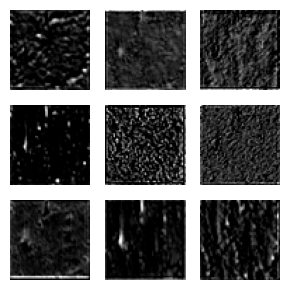

In [48]:
view_feature_map_sample(fmaps, n=9)

### Layer 2

In [49]:
layer2 = create_feature_extractor(resnet, return_nodes=['layer2'])

In [50]:
print(layer2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

Ensure the function grabs the layers on its way down to layer 2

In [53]:
fmaps = layer2(image.unsqueeze(0))['layer2'].squeeze(0).detach().numpy()
fmaps.shape

(128, 29, 29)

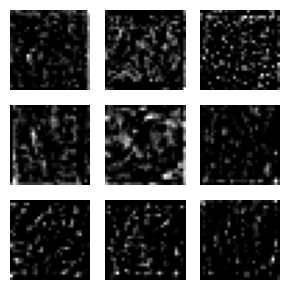

In [54]:
view_feature_map_sample(fmaps, n=9)

### Layer 3

In [55]:
layer3 = create_feature_extractor(resnet, return_nodes=['layer3'])

In [56]:
fmaps = layer3(image.unsqueeze(0))['layer3'].squeeze(0).detach().numpy()
fmaps.shape

(256, 15, 15)

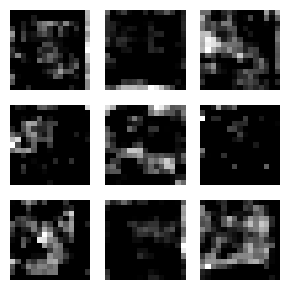

In [57]:
view_feature_map_sample(fmaps, n=9)

### Layer 4

In [58]:
layer4 = create_feature_extractor(resnet, return_nodes=['layer4'])

In [59]:
fmaps = layer4(image.unsqueeze(0))['layer4'].squeeze(0).detach().numpy()
fmaps.shape

(512, 8, 8)

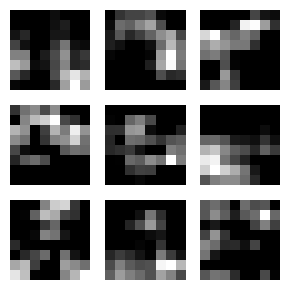

In [60]:
view_feature_map_sample(fmaps, n=9)

This lower level data L4 is what will then be pooled and given to the classification layer